In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import hdbscan
from sklearn.manifold import TSNE

### 데이터 살펴보기
- tag_prior_0720
- nlp_df: 자연어처리를 통해 클러스터링한 label데이터

In [2]:
path = "../../datas/"
algo_df = pd.read_csv(path+"tag_prior_0720.csv")
algo_df = algo_df.loc[:,~algo_df.columns.str.match("Unnamed")]
nlp_df = pd.read_csv(path+"camp_description.csv")[['facltNm', 'labels']]
len(algo_df), len(nlp_df)

(2611, 1410)

### 클러스터링

In [3]:
import camp_clustering as cc
ccl = cc.CampCluster()

### min_cluster_size=120
- 클러스터 4개

Cluster labels: 5 개
original data length: 1159 / clustering data length: 1159
cluster
-1     71
 0    207
 1    489
 2    152
 3    240
Name: cluster, dtype: int64
Condensed tree plot


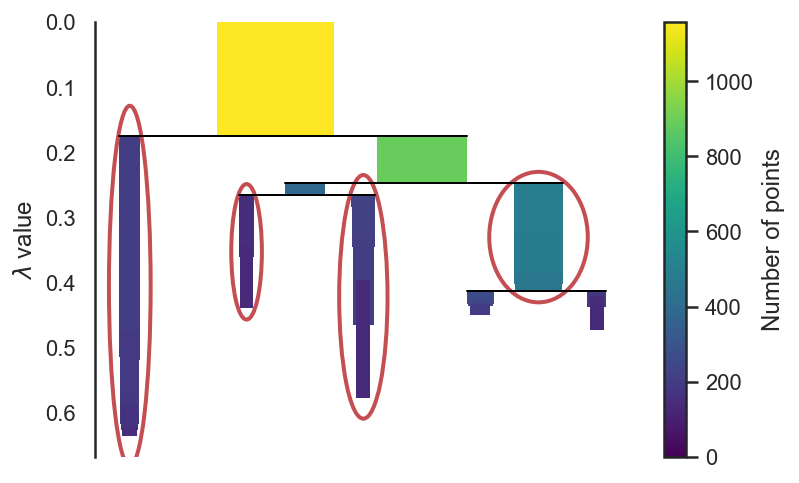

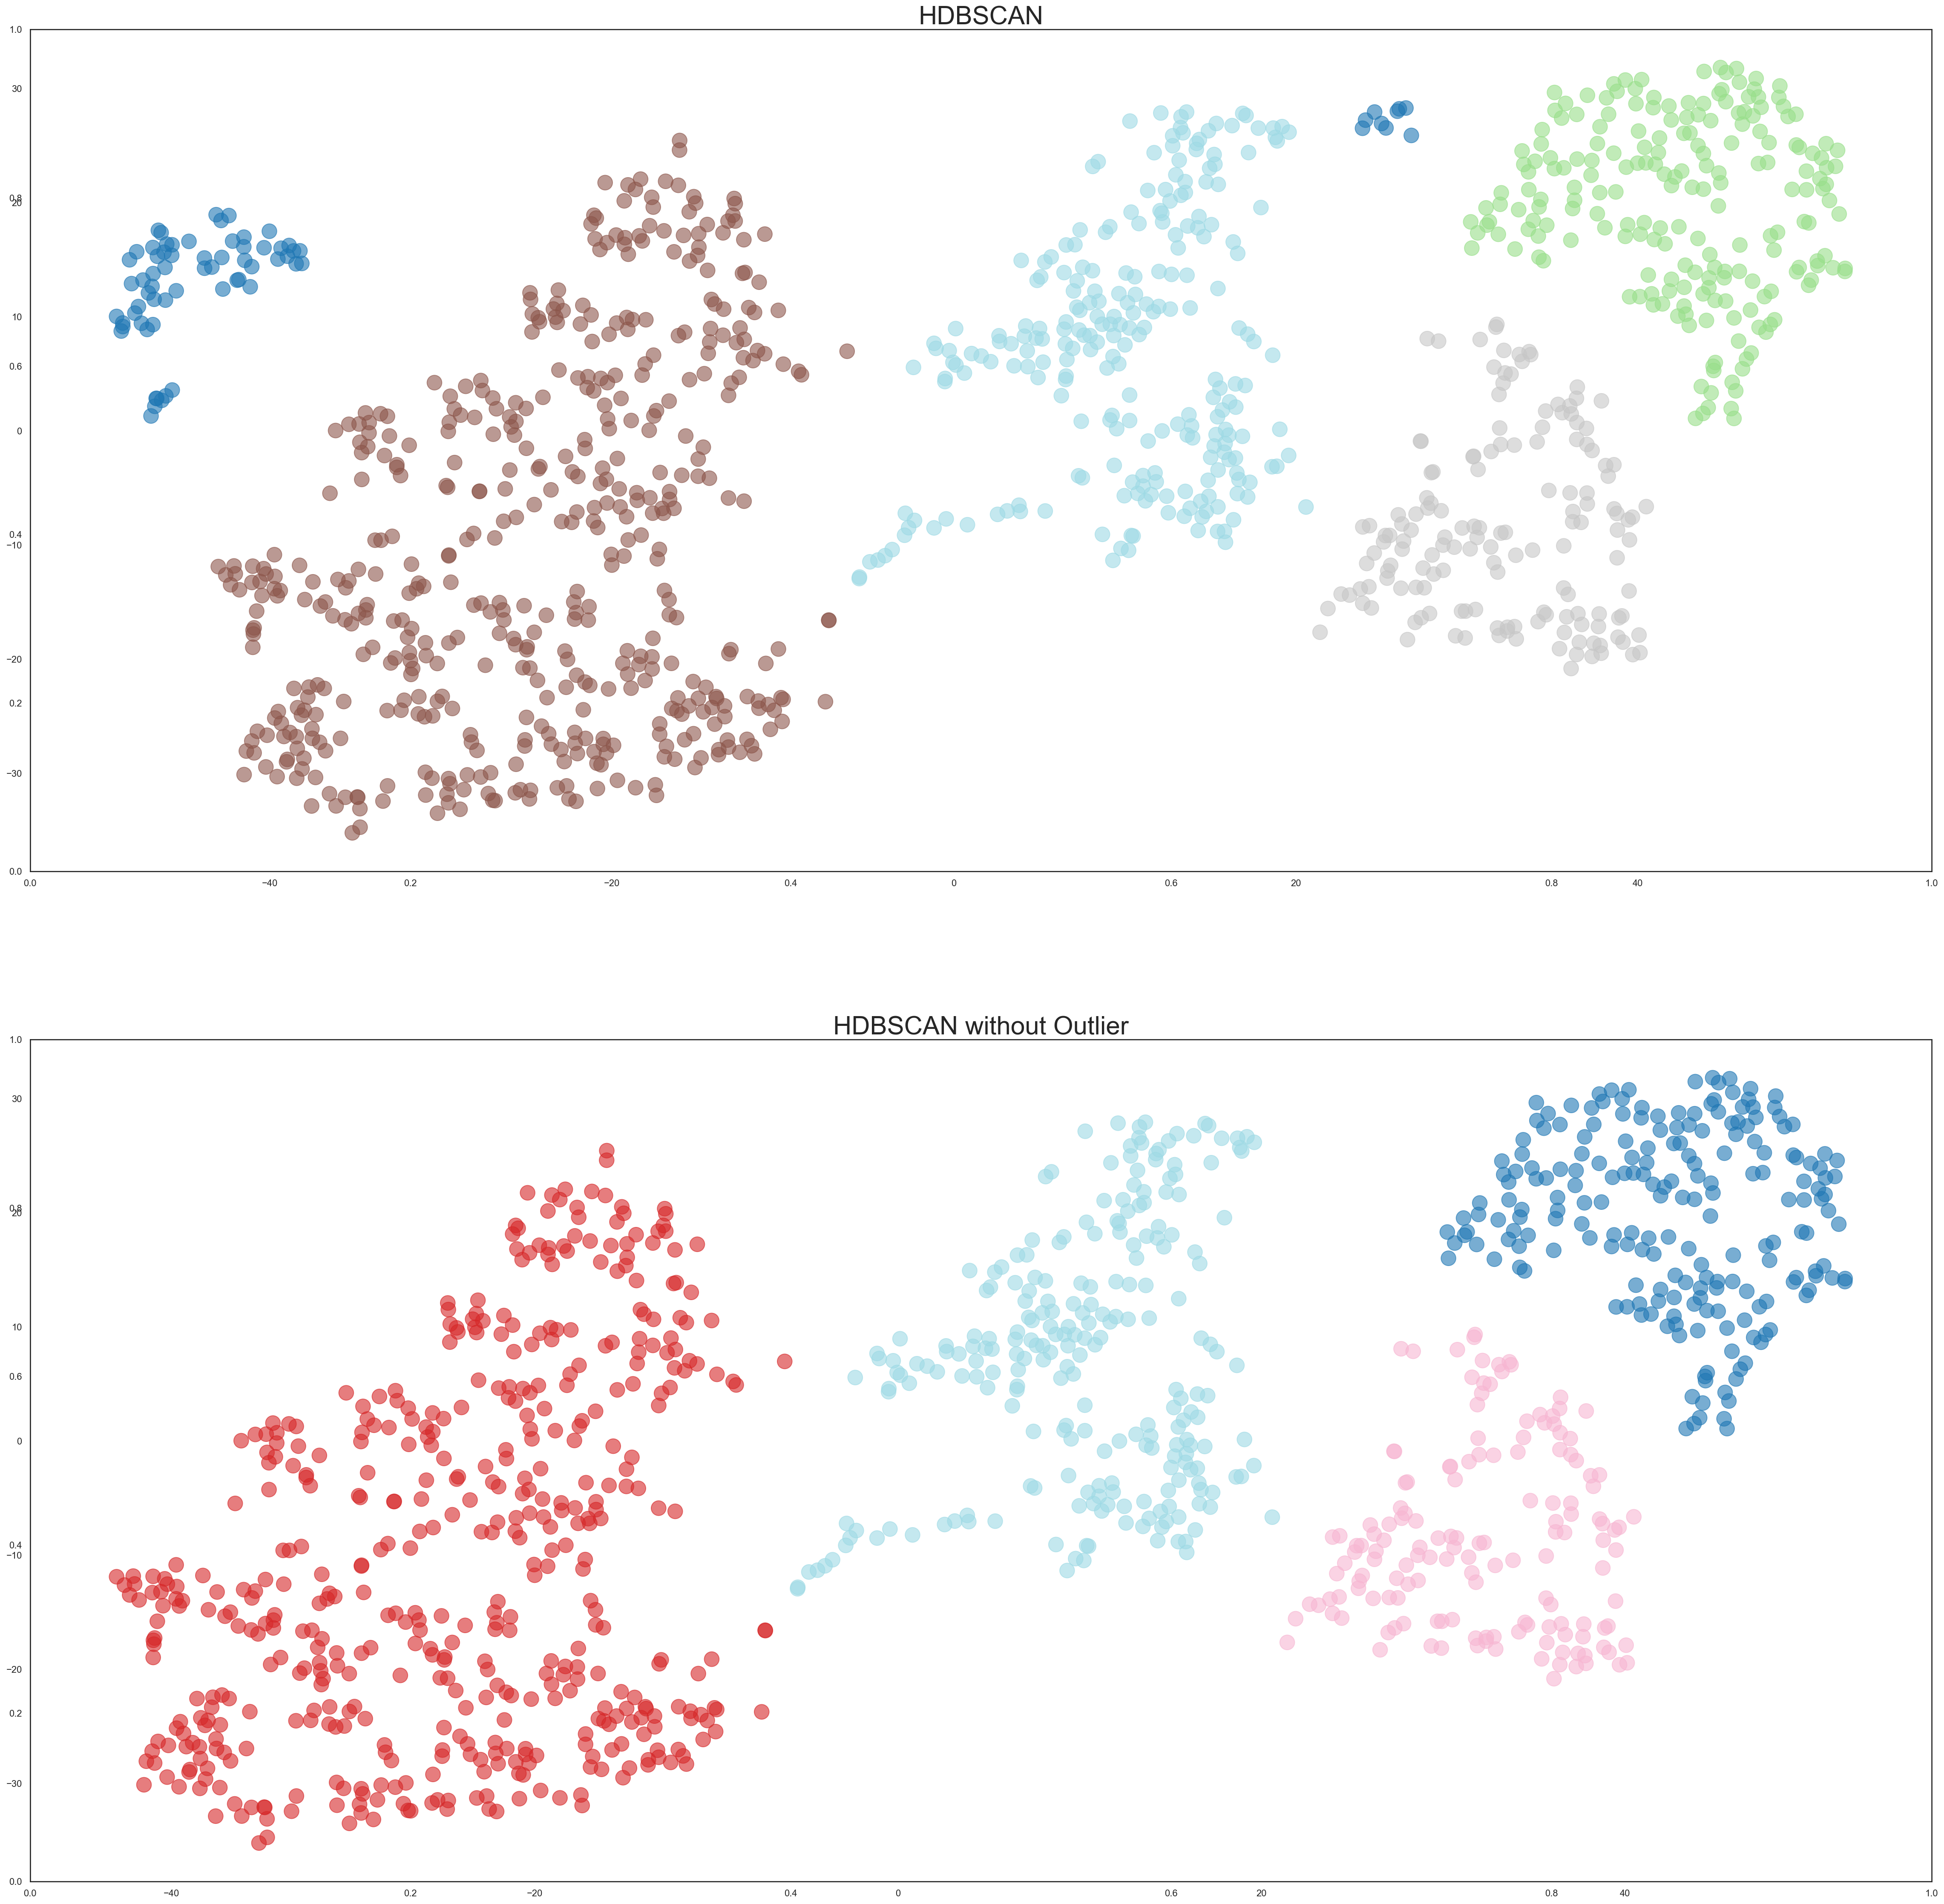

In [4]:
df2 = ccl.hdbscan_clustering(min_cluster_size=120, tsne=True, over_avg=True)

### cluster 간의 편차 탐색

Dataframe Describe
         comfort   together        fun    healing      clean          x
count   4.000000   4.000000   4.000000   4.000000   4.000000    4.00000
mean   41.419563  49.247552  31.124734  40.298547  57.129676  272.00000
std     6.048216  10.898407   8.298572  17.617815  22.759808  149.15093
min    33.723313  38.279141  23.430921  22.440789  28.296115  152.00000
25%    38.499907  42.526858  25.155230  27.623081  46.840279  193.25000
50%    42.009594  47.592007  29.679417  38.913172  58.794386  223.50000
75%    44.929250  54.312701  35.648920  51.588638  69.083783  302.25000
max    47.935749  63.527053  41.709179  60.927053  82.633816  489.00000


comfort   together        fun    healing      clean    x
cluster                                                            
-1       41.088732  53.066197  36.404225  32.494366   8.423944   71
 0       47.935749  63.527053  41.709179  60.927053  82.633816  207
 1       33.723313  38.279141  33.628834  29.350511  28.296115  489
 2       40.092105  43.942763  23.430921  22.440789  64.567105  152
 3       43.927083  51.241250  25.730000  48.475833  53.021667  240

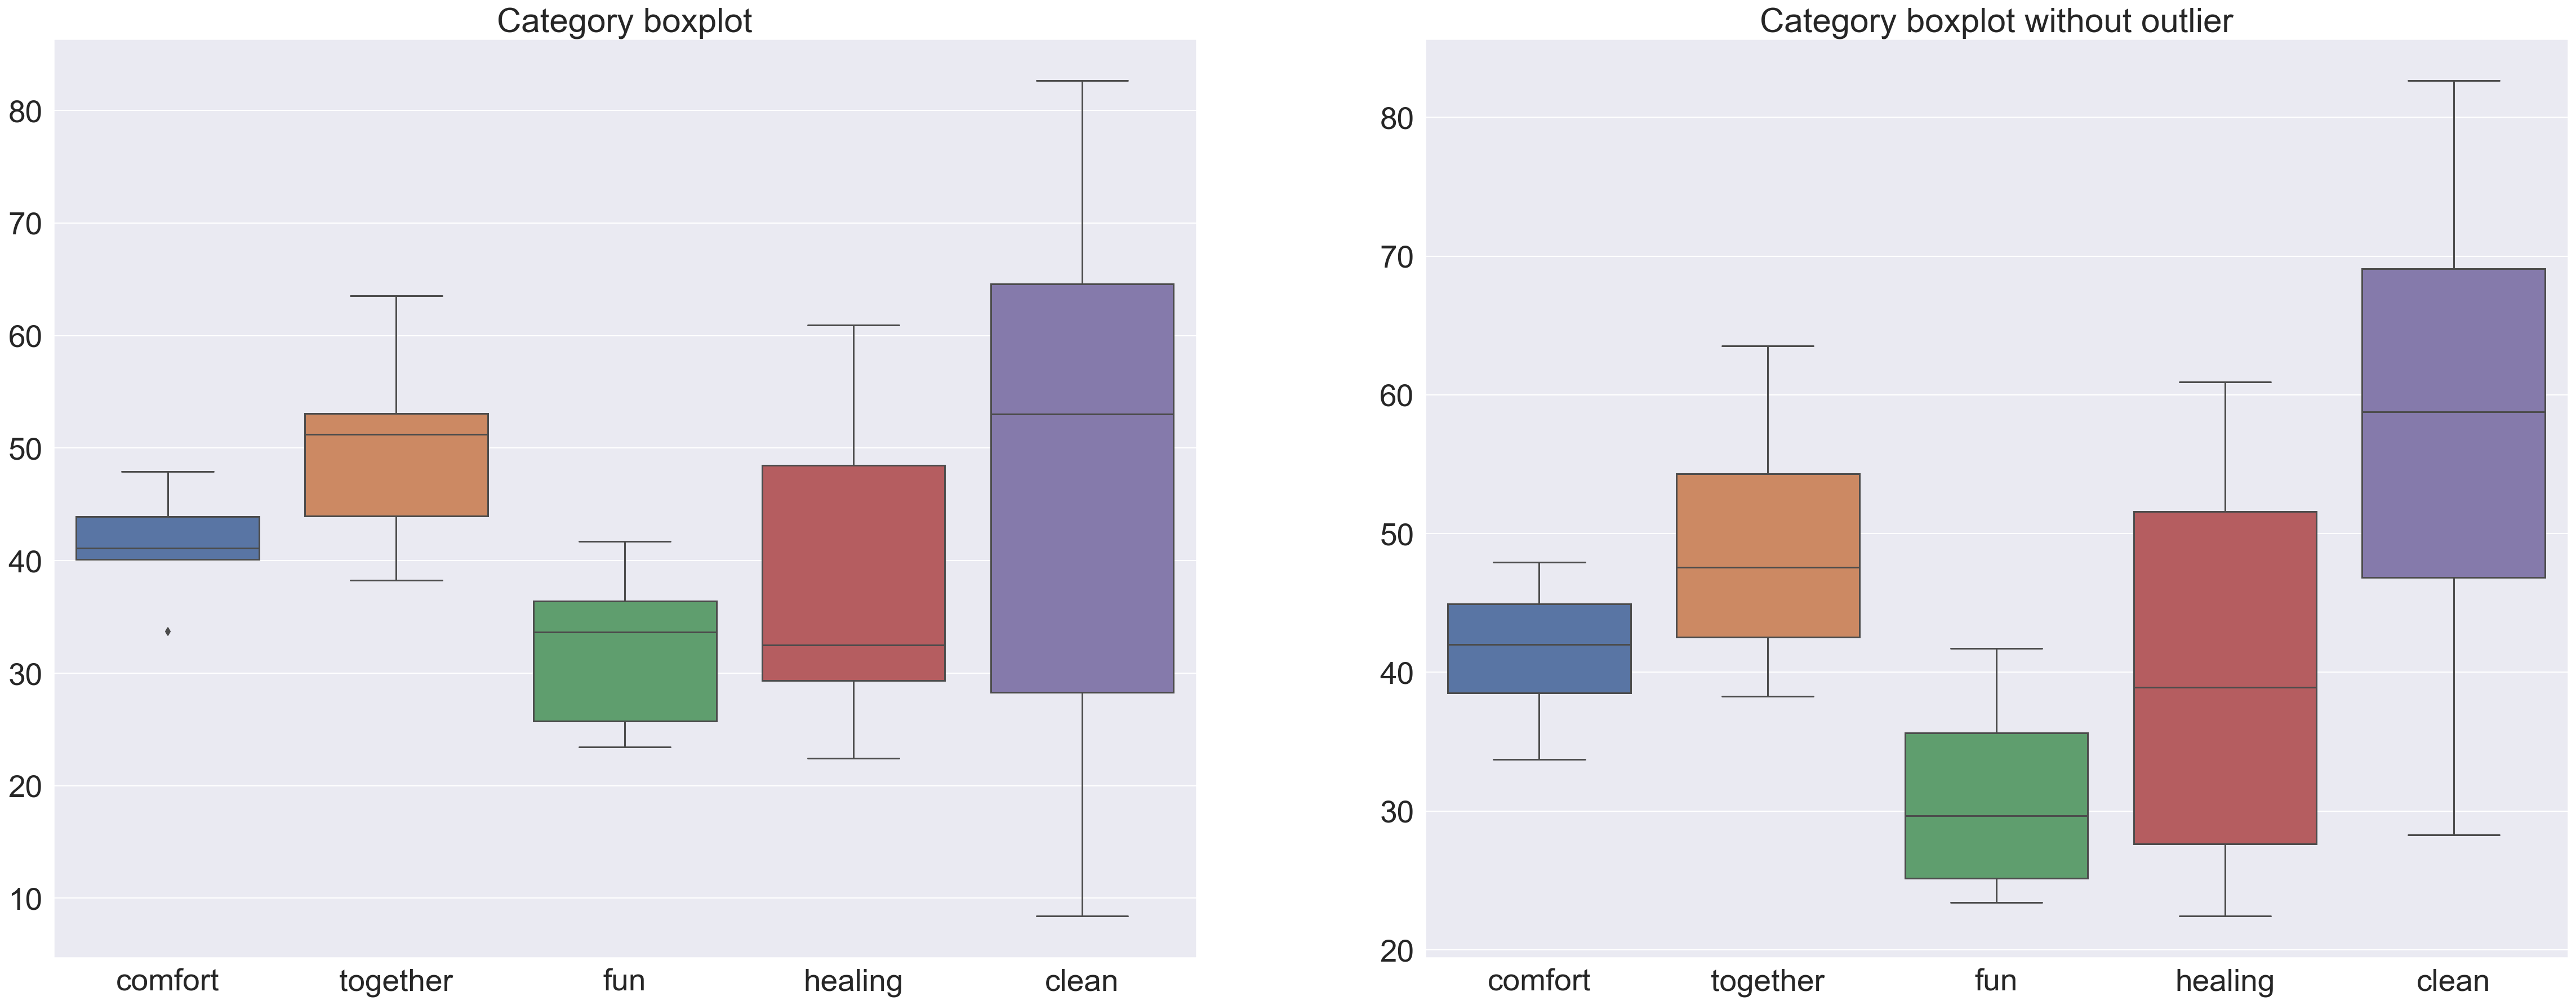

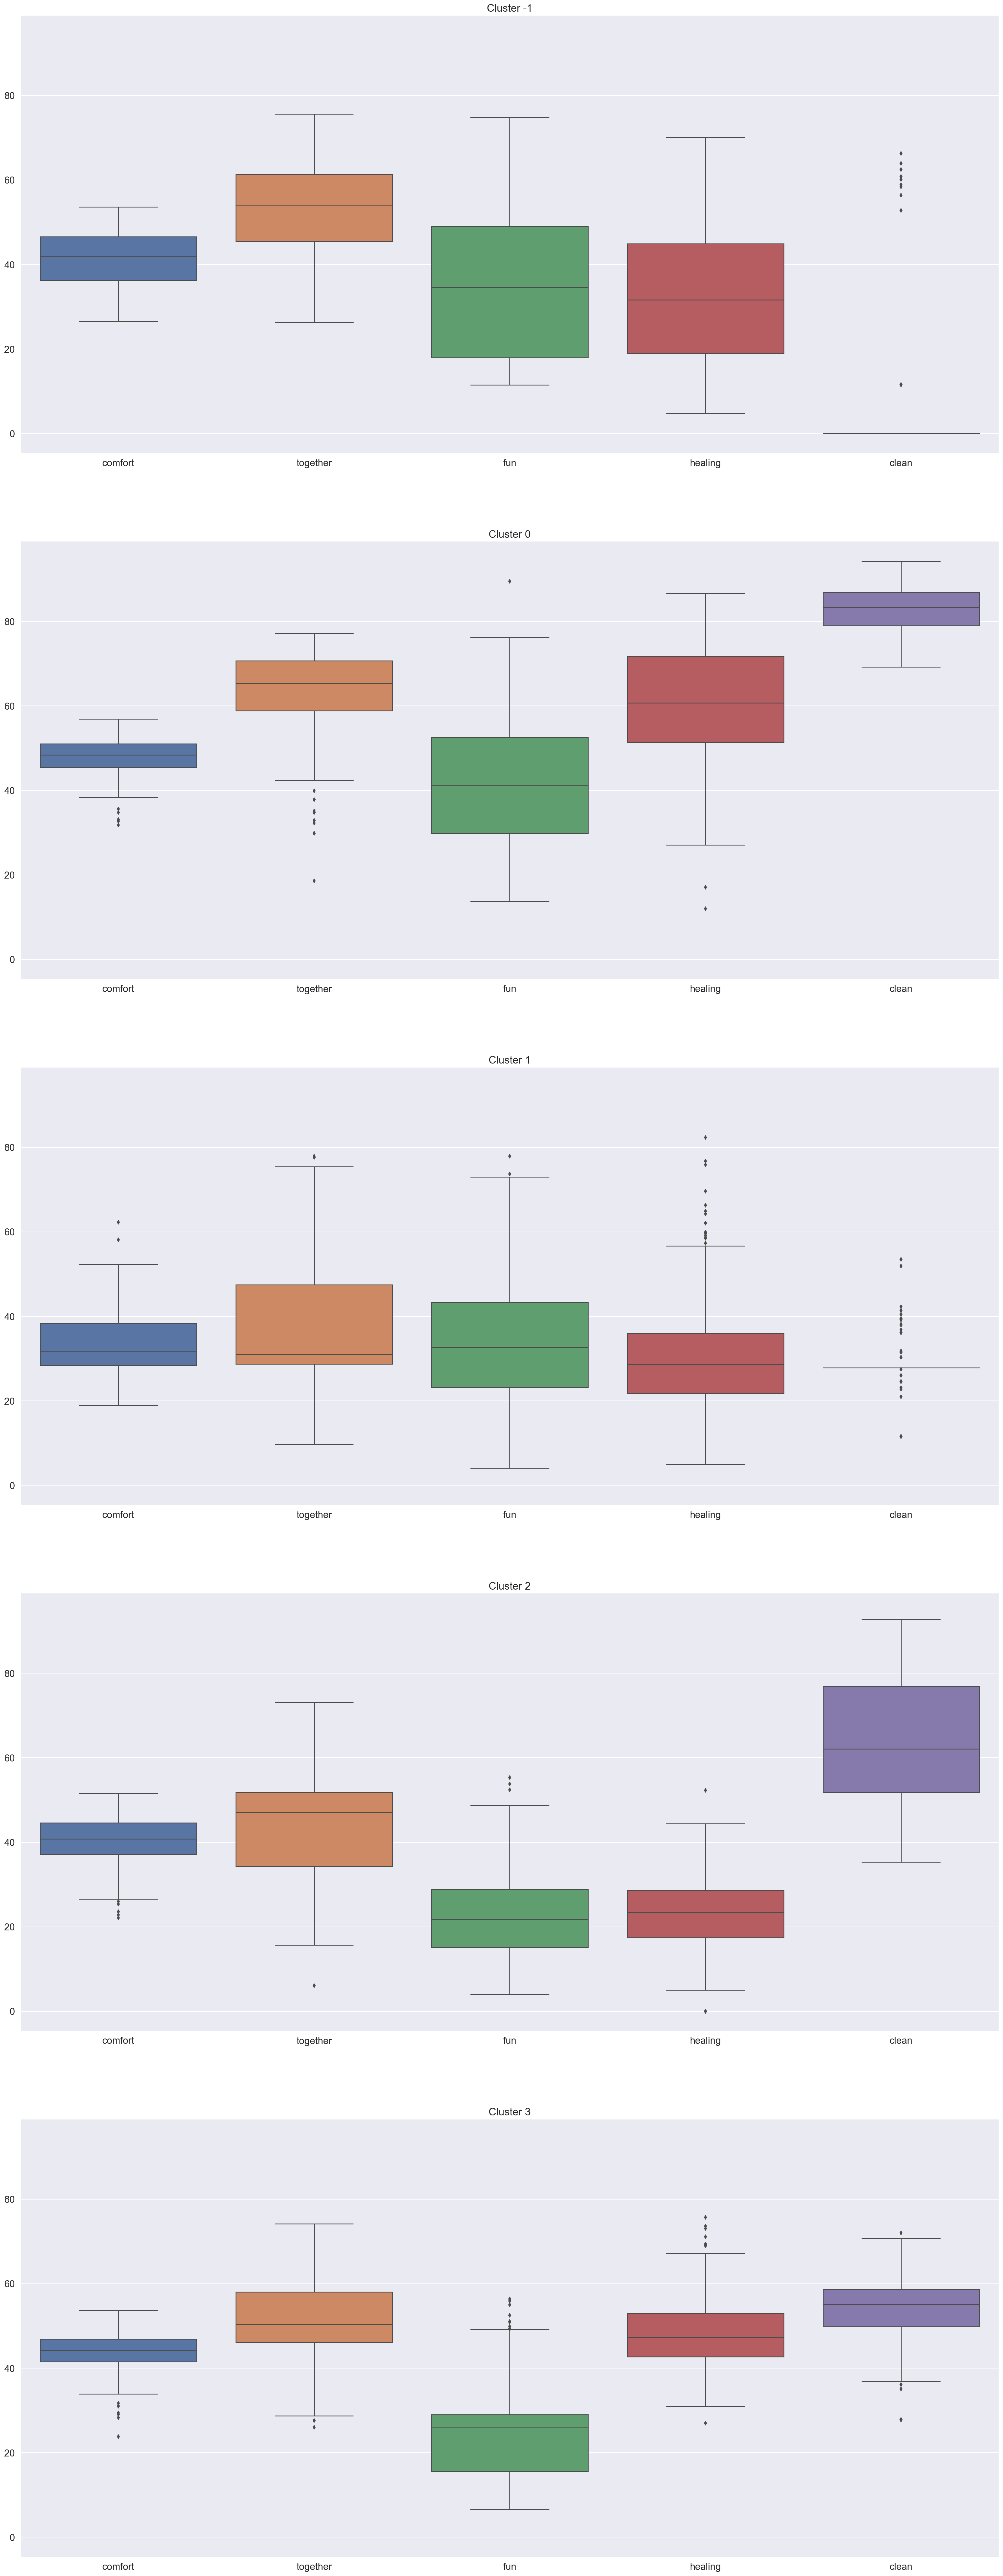

In [5]:
pv2 = ccl.cluster_eda(df2)
pv2

In [6]:
ccl.export_result(df2)

Report has Saved!


### Top_tags 를 활용한 wordcloud 만들기

In [7]:
import tag_points as tp
tag = tp.TagPoints()

In [8]:
# tag_df = pd.read_csv(path+"top7_tags_0720_14:43:29.csv")
tag_df = pd.read_csv(path+"top5_tags_0720.csv")
tag_df

Unnamed: 0  index                                          top5_tags
0              0   7934                                                 []
1              1   7935           ['수영장 있는', '시설이 좋은', '친절한', '깨끗한', '힐링']
2              2   7936                                                 []
3              3   7939                            ['힐링', '시설이 좋은', '친절한']
4              4   7940                                                 []
...          ...    ...                                                ...
2606        2606   3290              ['계곡 옆', '그늘이 많은', '물맑은', '힐링', '가족']
2607        2607   3291                 ['온수 잘 나오는', '계곡 옆', '힐링', '재미있는']
2608        2608   3434  ['사이트 간격이 넓은', '차 대기 편한', '가족', '자전거 타기 좋은', '...
2609        2609   3436  ['가족', '아이들 놀기 좋은', '사이트 간격이 넓은', '계곡 옆', '그늘이...
2610        2610   3440  ['계곡 옆', '물맑은', '별보기 좋은', '사이트 간격이 넓은', '온수 잘 ...

[2611 rows x 3 columns]

In [9]:
df2.reset_index(inplace=True)
tag_cs_df = df2[['contentId', 'camp', 'cluster', 'comfort', 'together', 'fun', 'healing', 'clean']].copy()
tag_cs_df = pd.merge(tag_cs_df, tag_df, how='left', left_on="contentId", right_on="index")
replace_ls = [" ", "[", "]", "'"]
for r_ele in replace_ls:
    tag_cs_df['top5_tags'] = [r.replace(r_ele, "") for r in tag_cs_df['top5_tags']]
tag_cs_df['top5_tags'] = [r.replace(",", " / ") for r in tag_cs_df['top5_tags']]
# tag_cs_df['tags'] = [r.split(",") for r in tag_cs_df['tags']]
tag_cs_df = tag_cs_df.loc[:, ~tag_cs_df.columns.str.match("Unnamed")]
tag_cs_df.drop('index', axis=1, inplace=True)
tag_cs_df

contentId            camp  cluster  comfort  together   fun  healing  \
0          7935        성주선바위캠핑장        3     43.4      48.8  27.5     44.1   
1          7948              답게        3     45.6      50.7  15.0     51.9   
2          7951           올레야영장        3     47.3      48.9  28.9     53.4   
3          7954  황매산미리내파크 오토캠핑장        3     47.9      49.7  14.6     50.9   
4          7956         삼강나루캠핑장        2     32.0      52.7  53.8     18.0   
...         ...             ...      ...      ...       ...   ...      ...   
1154       6803       백양사 가인야영장        3     39.7      59.7  21.6     40.0   
1155       6804         백운계곡캠핑장        2     23.6      26.0  19.5     34.8   
1156       6806       뱀사골 힐링야영장        1     20.4      38.0  26.5     34.6   
1157       3290      폭포가 있는 캠핑장        3     41.4      37.5  14.0     57.3   
1158       3436         함허동천야영장       -1     32.1      66.5  16.7     21.8   

      clean                              top5_tags  
0      57.6         수영장있는 / 시설이좋은 / 친절한 / 깨끗한 / 힐링  
1      60.3          접근성좋은 / 친절한 / 힐링 / 깨끗한 / 뷰가좋은  
2      55.6    먹거리가풍부한 / 뷰가좋은 / 힐링 / 수영장있는 / 접근성좋은  
3      58.6        먹거리가풍부한 / 친절한 / 힐링 / 깨끗한 / 뷰가좋은  
4      89.9          둘레길 / 문화유적 / 축제 / 생태교육 / 재미있는  
...     ...                                    ...  
1154   53.1        가족 / 아이들놀기좋은 / 커플 / 계곡옆 / 그늘이많은  
1155   65.4    계곡옆 / 여유있는 / 힐링 / 사이트간격이넓은 / 온수잘나오는  
1156   27.8            가족 / 커플 / 계곡옆 / 그늘이많은 / 물맑은  
1157   40.5            계곡옆 / 그늘이많은 / 물맑은 / 힐링 / 가족  
1158    0.0  가족 / 아이들놀기좋은 / 사이트간격이넓은 / 계곡옆 / 그늘이많은  

[1159 rows x 9 columns]

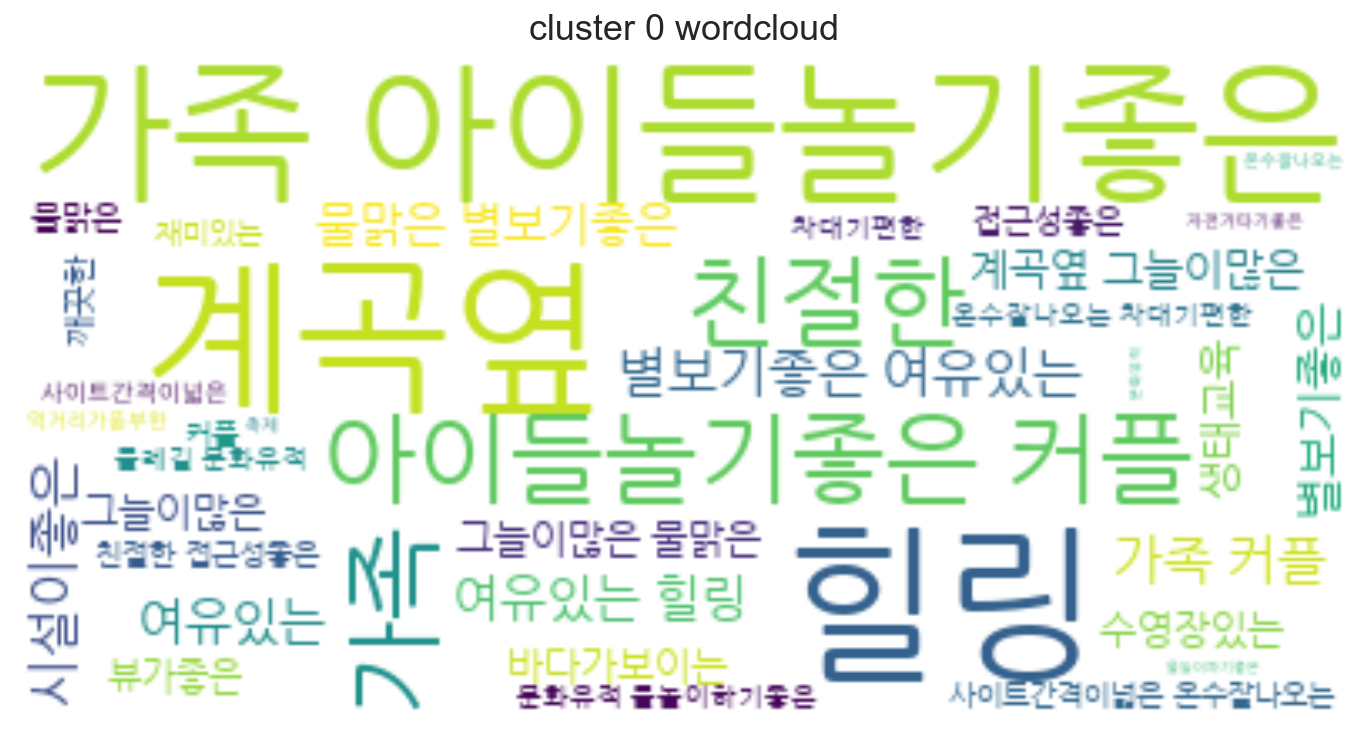

{'힐링': 1.0, '계곡옆': 0.9555555555555556, '가족 아이들놀기좋은': 0.9555555555555556, '아이들놀기좋은 커플': 0.7111111111111111, '가족': 0.6888888888888889, '친절한': 0.6666666666666666, '별보기좋은 여유있는': 0.6, '시설이좋은': 0.5777777777777777, '가족 커플': 0.5777777777777777, '여유있는 힐링': 0.5333333333333333, '여유있는': 0.5111111111111111, '별보기좋은': 0.4222222222222222, '물맑은 별보기좋은': 0.4, '생태교육': 0.35555555555555557, '계곡옆 그늘이많은': 0.35555555555555557, '수영장있는': 0.3111111111111111, '바다가보이는': 0.28888888888888886, '그늘이많은': 0.28888888888888886, '그늘이많은 물맑은': 0.28888888888888886, '뷰가좋은': 0.24444444444444444, '접근성좋은': 0.2222222222222222, '깨끗한': 0.2222222222222222, '물맑은': 0.2222222222222222, '사이트간격이넓은 온수잘나오는': 0.2222222222222222, '커플': 0.2, '재미있는': 0.2, '친절한 접근성좋은': 0.2, '문화유적 물놀이하기좋은': 0.2, '차대기편한': 0.17777777777777778, '온수잘나오는 차대기편한': 0.15555555555555556, '둘레길 문화유적': 0.15555555555555556, '사이트간격이넓은': 0.13333333333333333, '먹거리가풍부한': 0.1111111111111111, '온수잘나오는': 0.08888888888888889, '자전거타기좋은': 0.08888888888888889, '축제': 0.08888888888888889, '문

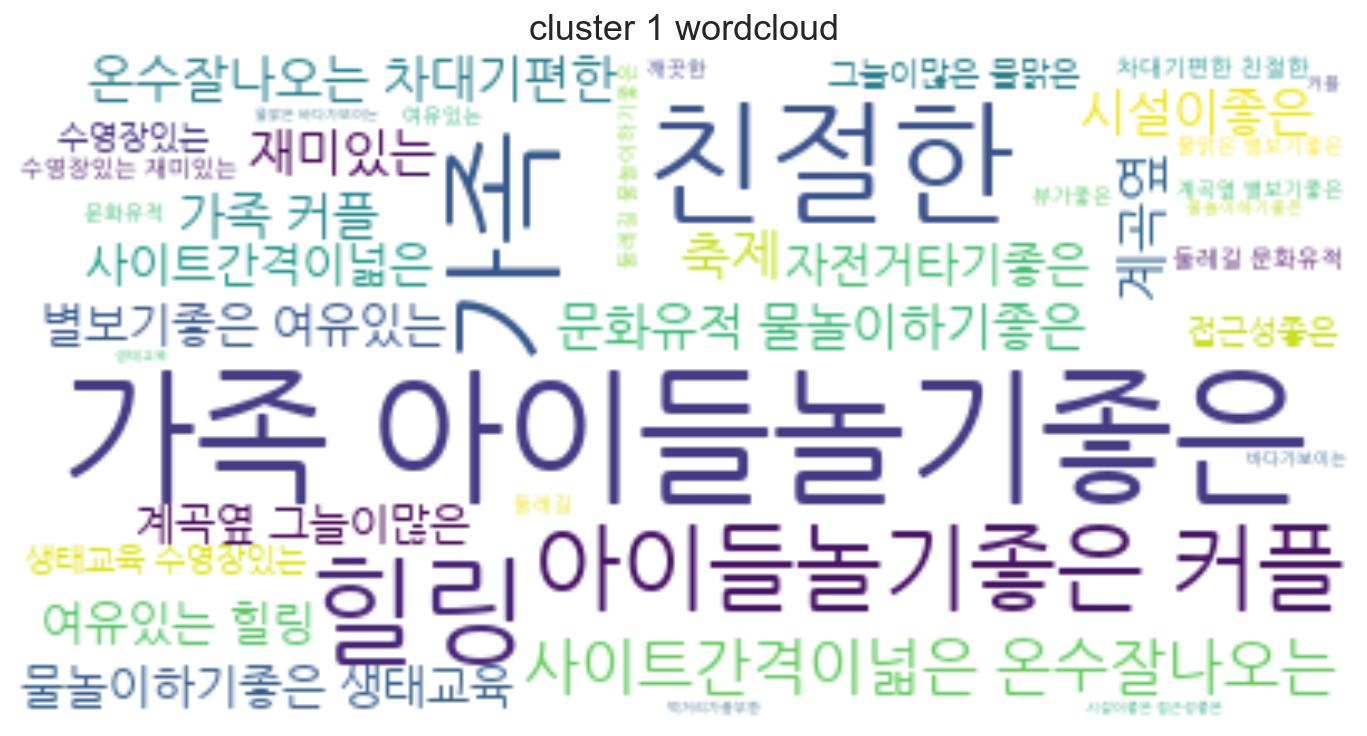

{'가족 아이들놀기좋은': 1.0, '친절한': 0.8686868686868687, '가족': 0.7878787878787878, '힐링': 0.696969696969697, '아이들놀기좋은 커플': 0.6161616161616161, '사이트간격이넓은 온수잘나오는': 0.5959595959595959, '계곡옆': 0.46464646464646464, '축제': 0.4444444444444444, '문화유적 물놀이하기좋은': 0.42424242424242425, '온수잘나오는 차대기편한': 0.42424242424242425, '재미있는': 0.41414141414141414, '가족 커플': 0.41414141414141414, '시설이좋은': 0.3939393939393939, '별보기좋은 여유있는': 0.3838383838383838, '물놀이하기좋은 생태교육': 0.36363636363636365, '여유있는 힐링': 0.3434343434343434, '사이트간격이넓은': 0.3333333333333333, '자전거타기좋은': 0.32323232323232326, '계곡옆 그늘이많은': 0.31313131313131315, '생태교육 수영장있는': 0.30303030303030304, '접근성좋은': 0.2828282828282828, '그늘이많은 물맑은': 0.2727272727272727, '수영장있는': 0.26262626262626265, '수영장있는 재미있는': 0.26262626262626265, '둘레길 문화유적': 0.26262626262626265, '차대기편한 친절한': 0.26262626262626265, '문화유적': 0.2222222222222222, '둘레길 물놀이하기좋은': 0.2222222222222222, '둘레길': 0.21212121212121213, '뷰가좋은': 0.20202020202020202, '물맑은 별보기좋은': 0.20202020202020202, '깨끗한': 0.1919191919191919, '여유

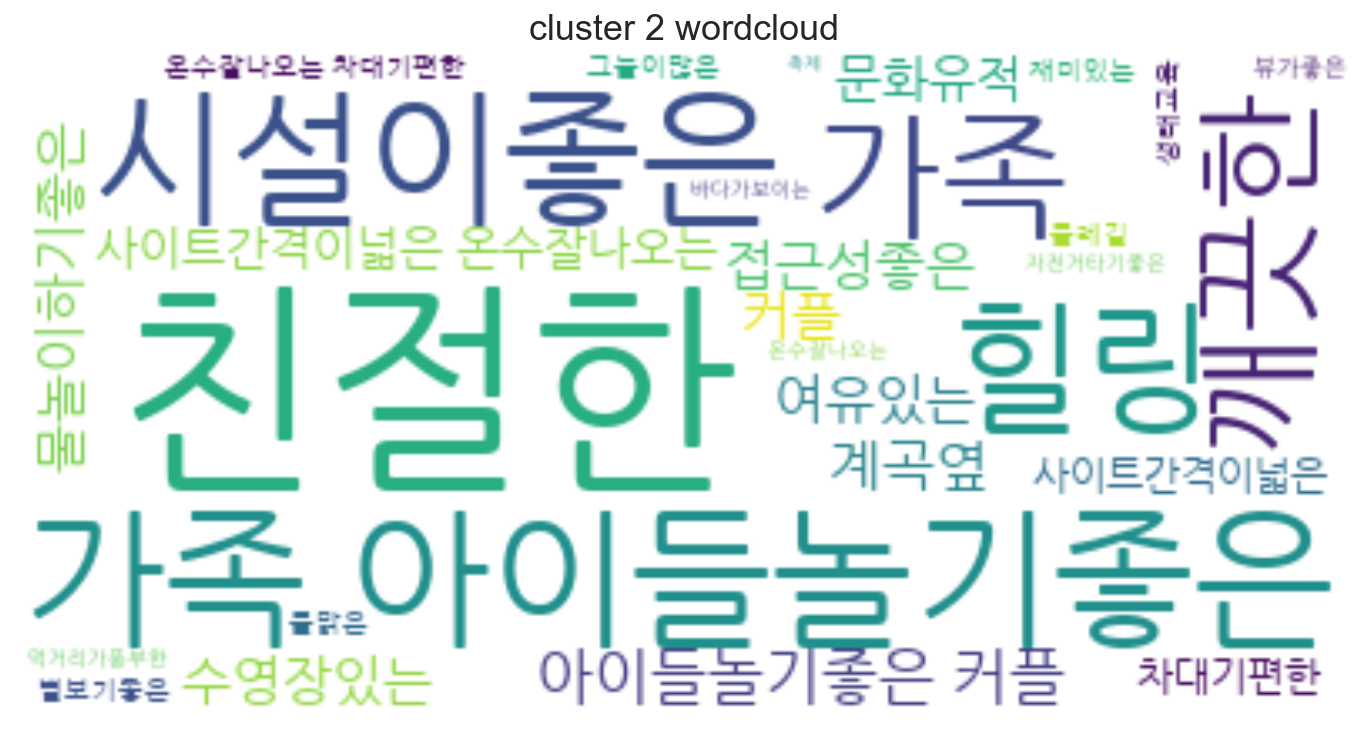

{'친절한': 1.0, '가족 아이들놀기좋은': 0.6349206349206349, '시설이좋은': 0.6031746031746031, '힐링': 0.5555555555555556, '가족': 0.5079365079365079, '깨끗한': 0.4603174603174603, '아이들놀기좋은 커플': 0.3968253968253968, '계곡옆': 0.36507936507936506, '수영장있는': 0.31746031746031744, '접근성좋은': 0.30158730158730157, '물놀이하기좋은': 0.2857142857142857, '커플': 0.2857142857142857, '여유있는': 0.2857142857142857, '문화유적': 0.23809523809523808, '사이트간격이넓은 온수잘나오는': 0.23809523809523808, '사이트간격이넓은': 0.1746031746031746, '차대기편한': 0.1746031746031746, '온수잘나오는 차대기편한': 0.1746031746031746, '둘레길': 0.15873015873015872, '생태교육': 0.15873015873015872, '별보기좋은': 0.15873015873015872, '재미있는': 0.14285714285714285, '물맑은': 0.14285714285714285, '그늘이많은': 0.14285714285714285, '뷰가좋은': 0.1111111111111111, '먹거리가풍부한': 0.09523809523809523, '자전거타기좋은': 0.09523809523809523, '온수잘나오는': 0.09523809523809523, '바다가보이는': 0.07936507936507936, '축제': 0.047619047619047616}


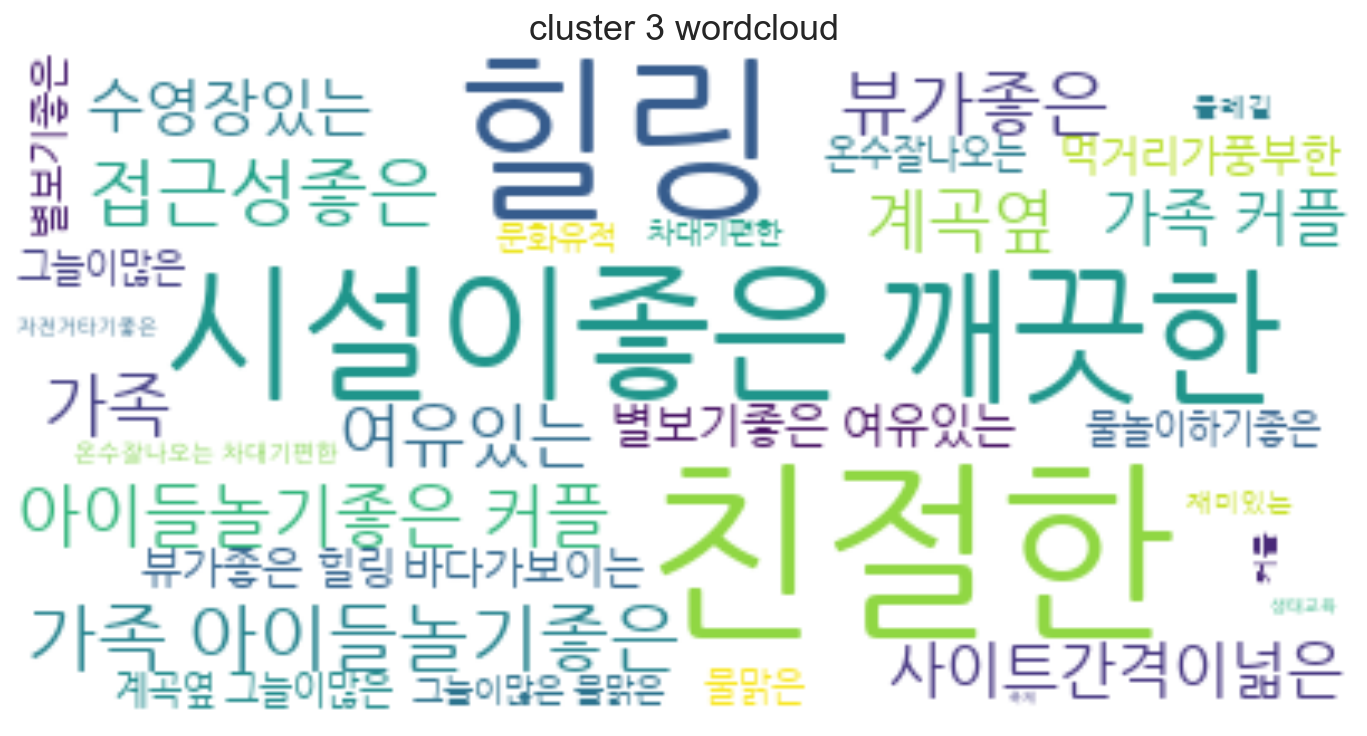

{'친절한': 1.0, '힐링': 0.8636363636363636, '시설이좋은': 0.625, '깨끗한': 0.5909090909090909, '가족 아이들놀기좋은': 0.5, '접근성좋은': 0.4772727272727273, '뷰가좋은': 0.4318181818181818, '가족': 0.375, '계곡옆': 0.375, '여유있는': 0.375, '아이들놀기좋은 커플': 0.36363636363636365, '사이트간격이넓은': 0.2840909090909091, '가족 커플': 0.2840909090909091, '수영장있는': 0.2727272727272727, '별보기좋은 여유있는': 0.26136363636363635, '뷰가좋은 힐링': 0.23863636363636365, '먹거리가풍부한': 0.22727272727272727, '바다가보이는': 0.2159090909090909, '별보기좋은': 0.17045454545454544, '온수잘나오는': 0.14772727272727273, '물놀이하기좋은': 0.13636363636363635, '물맑은': 0.13636363636363635, '계곡옆 그늘이많은': 0.13636363636363635, '그늘이많은': 0.125, '문화유적': 0.10227272727272728, '그늘이많은 물맑은': 0.10227272727272728, '차대기편한': 0.09090909090909091, '커플': 0.07954545454545454, '둘레길': 0.07954545454545454, '재미있는': 0.07954545454545454, '온수잘나오는 차대기편한': 0.06818181818181818, '자전거타기좋은': 0.045454545454545456, '생태교육': 0.03409090909090909, '축제': 0.022727272727272728}


In [10]:
c_ls = np.unique(tag_cs_df['cluster']).tolist()
for c in c_ls[1:]:
    t_df = tag_cs_df[tag_cs_df['cluster']==c]
    words_bag = ''
    for tags in t_df['top5_tags']:
        words_bag += (' / '+tags)
    wc = WordCloud(font_path='font/NanumGothic.ttf', background_color='white').generate(words_bag)
    plt.figure(figsize=(12, 12))
    plt.title(f"cluster {c} wordcloud")
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    print(wc.words_)